In [1]:
import pandas as pd

### Criar DataFrames com base nos Datasets

In [2]:
# Carregar Dataframe de Clientes (Customers)
df_customers = pd.read_csv('./datasets/churn_customers.csv')

In [3]:
# Mostrar 5 primeiros registros do DataFrame
df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# Mostrar 5 últimos registros do DataFrame
df_customers.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [5]:
# Mostrar schema do DataFrame
df_customers.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
# Carregar Dataframe de Serviços (Services)
df_services = pd.read_csv('./datasets/churn_services.csv')

In [7]:
# Carregar Dataframe de Contratos (Contracts)
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

### Transformação de Dados

In [8]:
# TotalCharges está como object
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [9]:
# Transformar coluna TotalCharges de String para Float - astype

# df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)

In [10]:
# Transformar coluna TotalCharges de String para Float - to_numeric

# df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)

In [11]:
# Transformar coluna TotalCharges de String para Float - to_numeric com coerce
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

In [12]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


> Após a transformação da coluna TotalCharges do Dataframe Contracts, a coluna passou a ter 11 missing values

### Renomear Colunas

In [13]:
# Renomear coluna no DataFrame, usando rename e dicionário
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [14]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
# Criar um Dataframe novo com base nas colunas renomeadas
df_customers_renamed = df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

In [16]:
df_customers_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [17]:
# Aplicar o resultado do rename no próprio Dataframe
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)

In [18]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [19]:
# Rename usando Lista - Modificar todos os nomes de colunas
df_customers.columns = ['IDCliente', 'Genero', 'Mais65Anos', 'TemParceiro', 'TemDependentes']

In [20]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65Anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Unificar Dataframes de Customers, Services e Contracts

In [21]:
# Contar quantidade de registros por Dataframe
len(df_customers)

7043

In [22]:
len(df_contracts)

7043

In [23]:
len(df_services)

7043

In [24]:
# Renomear colunas
df_services.rename(columns={'customerID': 'IDCliente'}, inplace=True)

In [25]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [26]:
# Unificar Dataframe de Customers com Services, criando um terceiro Dataframe
df_temp = df_customers.merge(df_services, on=['IDCliente'])

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   Genero            7043 non-null   object
 2   Mais65Anos        7043 non-null   int64 
 3   TemParceiro       7043 non-null   object
 4   TemDependentes    7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [28]:
df_temp.head(5)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No


In [29]:
# Unificar df_temp com Contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [30]:
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [31]:
# Unificar os três dataframes ao mesmo tmepo, com colunas com nomes diferentes
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [32]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [33]:
# Removendo coluna de um Dataframe
df_churn.drop(['customerID'], axis=1, inplace=True)

In [34]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Detecção de Valores ausentes

In [35]:
# Detectar Valores ausentes em todas as colunas de um Dataframe
df_churn.isna().sum()

IDCliente            0
Genero               0
Mais65Anos           0
TemParceiro          0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
# Detectar valores ausentes em uma coluna
df_churn.TotalCharges.isna().sum()

np.int64(11)

In [37]:
# Quantas linhas tem pelo menos 1 colunas com valor ausente
df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [38]:
# Quantas colunas tem pelo menos 1 valor ausente
df_churn.isna().any(axis=0).sum()

np.int64(1)

### Remover valores ausentes

In [39]:
# Remover de forma direta e específica
df_churn.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [40]:
# Remover colunas com valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [41]:
# Remover colunas onde todos os valores são ausentes
df_churn.dropna(axis=1, how='all')

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [42]:
# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=0, how='all')

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Inputação de Valores Ausentes

In [44]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [45]:
# Preencher valores padrão conforme a coluna
df_churn.fillna(value={'TotalCharges': 0, 'Genero': 'Não Declarado'})

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [46]:
# Preencher todos os valores de uma coluna com a média
media_TotalCharges = df_churn.TotalCharges.mean()
media_TotalCharges

np.float64(2283.3004408418656)

In [47]:
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Análise Univariada

Hipóteses
- A faixa etária tem forte associação com churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao Churn
- Cliente com contrato mensal é mais propenso ao Churn

In [48]:
# Como identificar valores possíveis (únicos) numa variável do Dataframe
df_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [49]:
# Contar clientes usando a variável Churn como referência
df_churn.Churn.value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [50]:
df_churn.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

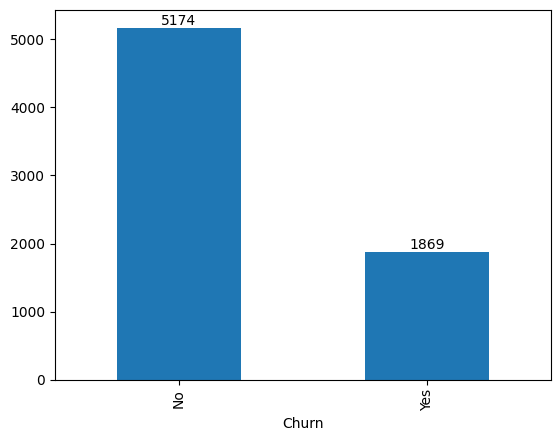

In [51]:
# Plot distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

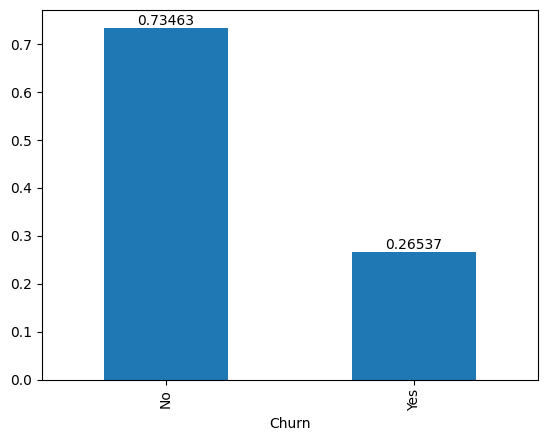

In [52]:
# Plot distribuição Churn (Quantidade)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [53]:
# Quais são os tipos de contrato
df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

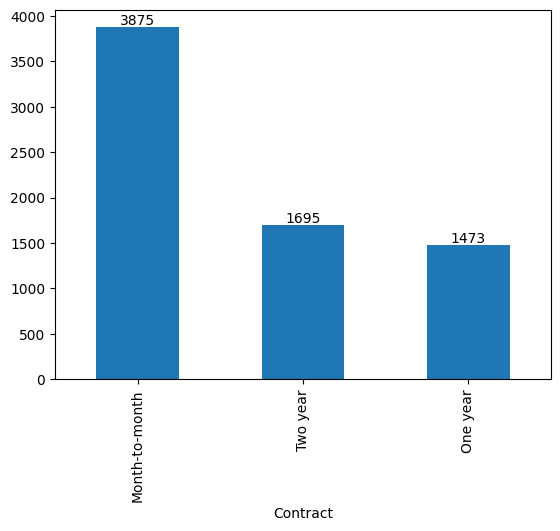

In [54]:
ax = df_churn.Contract.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

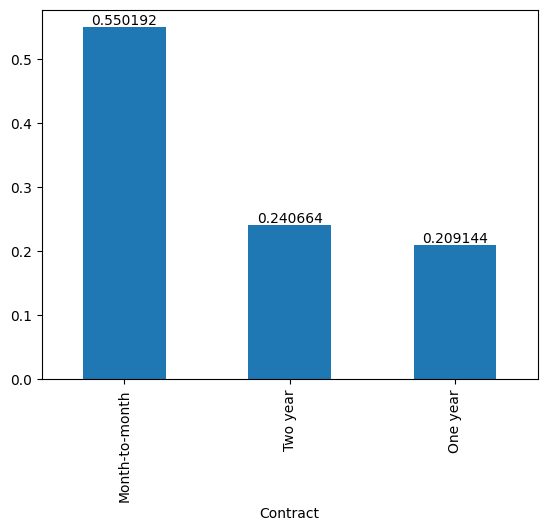

In [55]:
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

<Axes: ylabel='Frequency'>

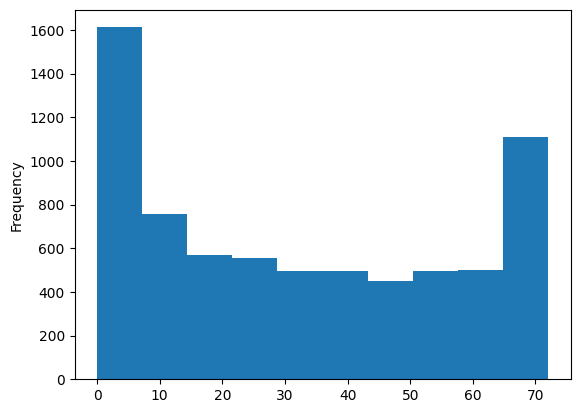

In [56]:
# Histograma do Tempo de Contrato
df_churn.tenure.plot.hist()

- A variável tempo de contrato (tenure) não apresenta visualmente uma distribuição normal
- Concentração nos extremos, ou seja, contratos com poucos meses e contratos longos

<Axes: ylabel='Frequency'>

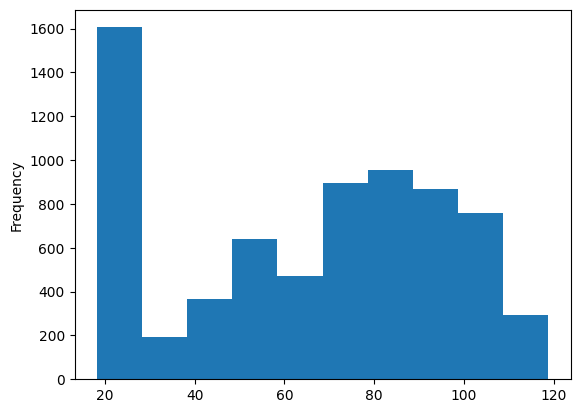

In [57]:
# Histograma do MonthlyCharges
df_churn.MonthlyCharges.plot.hist()

In [58]:
# Medidas de Posição - Media Tempo de Contrato
df_churn.tenure.mean()

np.float64(32.37114865824223)

In [59]:
# Medidas de Posição - Mediana Tempo de Contrato
df_churn.tenure.median()

np.float64(29.0)

In [60]:
# Medidas de Posição - Moda Tempo de Contrato
df_churn.tenure.mode()

0    1
Name: tenure, dtype: int64

In [61]:
# Medias de Dispersão - Desvio Padrão Tempo de Contrato
df_churn.tenure.std()

np.float64(24.55948102309446)

In [62]:
# Medidas de Dispersão - Coeficiente de Variação
df_churn.tenure.std() / df_churn.tenure.mean() * 100

np.float64(75.86842617906674)

In [63]:
# Quantos clientes possuem 1 mês de contrato - Filtro
len(df_churn[(df_churn.tenure == 1)])

613

In [64]:
# Quantos os clientes de 1 mês de contrato representem percentualmente
len(df_churn[(df_churn.tenure == 1)]) / len(df_churn) * 100

8.70367741019452

In [65]:
# Quantos clientes possuem entre 1 e 6 meses de contrato
len(df_churn[(df_churn.tenure >= 1) & (df_churn.tenure<=6)])

1470

In [66]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento por sumarização
df_churn.groupby(['tenure'])['tenure'].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

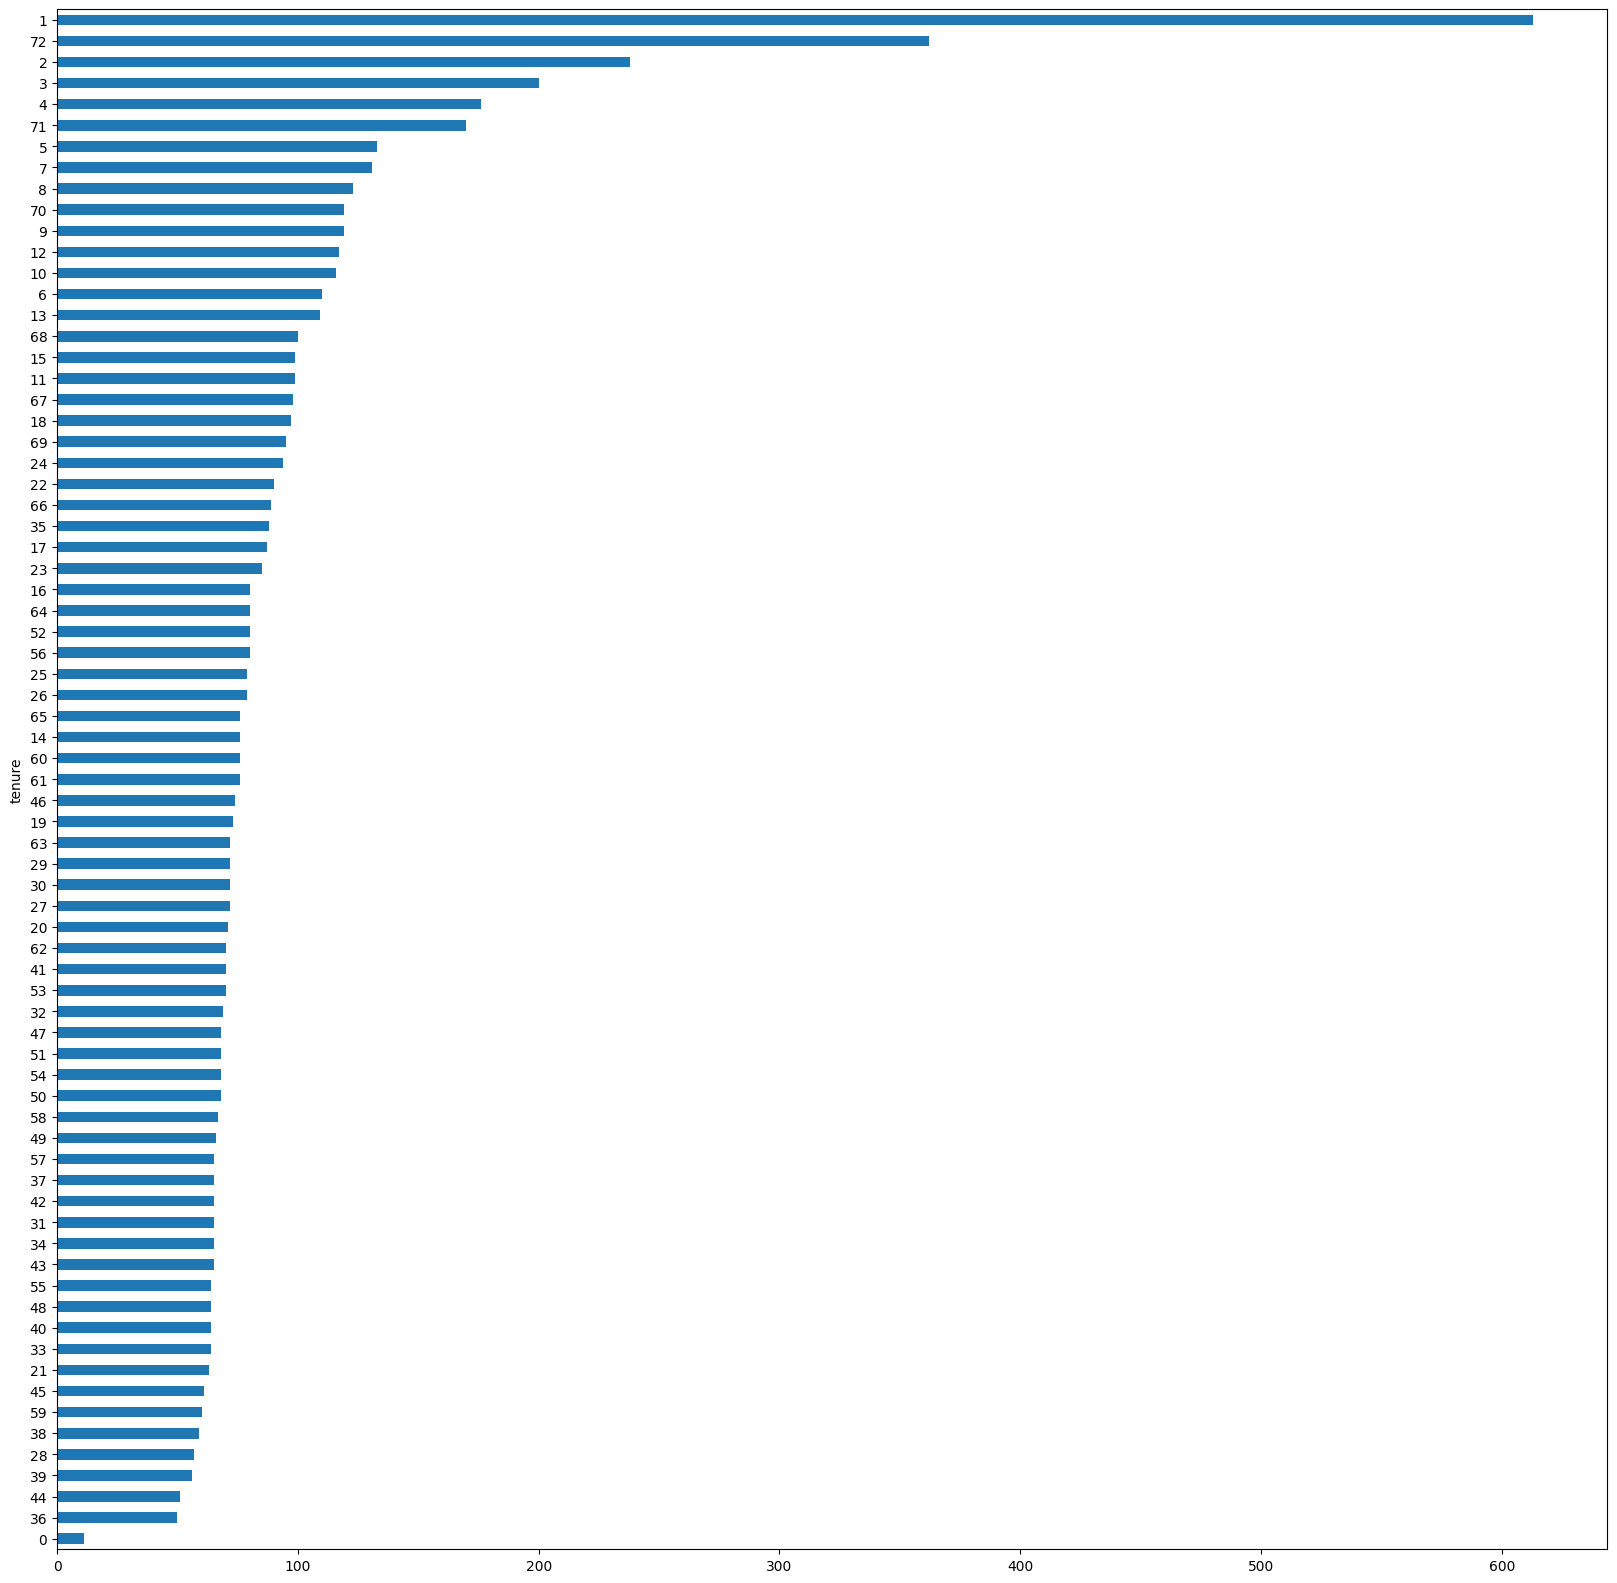

In [67]:
# Apresentar a quantidade de clientes por tempo de contrato - Agrupamento por sumarização - Em um plot
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize = (20,20))

### Análise Bivariada

In [68]:
# Hipótese: Clientes com Contrato do Tipo Mensal são mais propensos ao Churn - Quantidade

# Construir Tabela de Contingencia entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn, df_churn.Contract, margins=True, margins_name='Total')

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [69]:
# Hipótese: Clientes com Contrato do Tipo Mensal são mais propensos ao Churn - Proporção

# Construir Tabela de Contingencia entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn, df_churn.Contract, normalize='index', margins=True, margins_name='Total')

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


Considerando o publico total, os clientes de contrato mensal representam 55%. Porém, se considerarmos apenas os clientes que abandonaram o serviço, 88% tinham contrato mensal. 

Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono

In [70]:
# Avaliar a correlação entre duas variáveis categóricas (qualitativas)

# Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
# Num teste de hipótese, duas hipóteses são formuldas

# H0 (Hipótese Nula): as duas variáveis são independentes
# H1 (Hipótese Complementar): as duas variávies não são independentes

# O teste serve para confirmar ou recusar a hipótese nula (H0)
# Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value), recusamos a hipótese nula e seguimos com a complementar

In [71]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_contract = pd.crosstab(df_churn.Churn, df_churn.Contract)

In [72]:
# Calcular os Scores e P-Values
from scipy.stats import chi2_contingency

In [73]:
# Tupla - Lista imutável
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)

In [74]:
chi_scores_churn_contract

Chi2ContingencyResult(statistic=np.float64(1184.5965720837926), pvalue=np.float64(5.863038300673391e-258), dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [75]:
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])

In [76]:
# Apresentar numeros com decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

In [77]:
# Criar Dataframe com os resultados
df_chi_scores_churn_contract = pd.DataFrame({'Qui2': scores_churn_contract, 'p=value': pvalues_churn_contract})

In [78]:
# Analisar Scores e P-Values
df_chi_scores_churn_contract

,Qui2,p=value
0,1184.596572083792580,0.000000000000000


Conforme Teste Estatístico (Chi-Square), o P-value <= 0.05, desta forma rejeitamos a hipótese nula, ou seja, as variáveis não são independentes. Pelo Qui2 alto, podemos afirmar que há uma forte correlação.

In [79]:
# Avaliar a correlação entre uma variável qualitativa e quantitativa
# Usar o mesmo teste de Chi-Square, mas transformar a variável quantitativa em qualitativa

# Hipótese: Cliente com menos de 6 meses de contrato é mais propenso ao Churn

# Criar uma coluna nova no Dataframe com base em uma condição de outra coluna
# Coluna = 'TempoMenor6Meses'

import numpy as np

In [80]:
# Criar coluna nova
df_churn['TempoMenor6Meses'] = np.where(df_churn.tenure<6, 'Yes', 'No')

In [81]:
# Chegar o dataframe
df_churn.head(5)

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes


In [82]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_tenure = pd.crosstab(df_churn.Churn, df_churn.TempoMenor6Meses)

In [83]:
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])

df_chi_scores_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 'p-value': pvalues_churn_tenure})

In [84]:
# Analisar os resultados
df_chi_scores_tenure

,Qui2,p-value
0,669.721615828710242,0.000000000000000


Como o P-Value <= 0.05, rejeitamos a H0, ou seja, as variáveis não são independentes.

Vale mencionar que com base do Qui2 resultante das 2 análises, a correlação entre Churn e Tempo de Contrato < 6 meses é menor que a correlação entre Churn e Tipo de Contrato

In [85]:
# Correlação entre 2 variávies numéricas
# Tenure com TotalCharges
# A hipótese é que quanto mais tempo de contrato maior o valor pago

# Correlação entre 2 variáveis numérica - Pearson
df_churn.tenure.corr(df_churn.TotalCharges)


np.float64(0.8258804609332018)

In [86]:
# Correlação entre 2 variáveis numérica - Spearman
df_churn.tenure.corr(df_churn.TotalCharges, method='spearman')

np.float64(0.8891770805365491)

Há uma forte correlação entre Tenure e TotalCharge

<Axes: xlabel='tenure', ylabel='TotalCharges'>

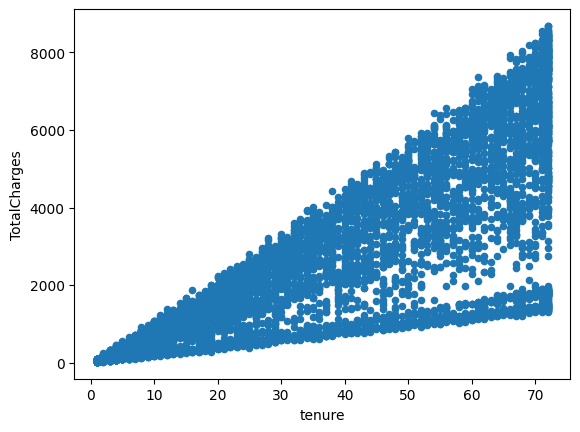

In [87]:
# Apresentar Plot Scatter entre Tenure e TotalCharges

# Gráfico de Dispersão
df_churn.plot.scatter(x='tenure', y='TotalCharges')

### Detecção de Outliers (Valores Atípicos)

In [88]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65Anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
# Remover linhas com valores nulos
df_churn.dropna(axis=0, inplace=True)

<Axes: >

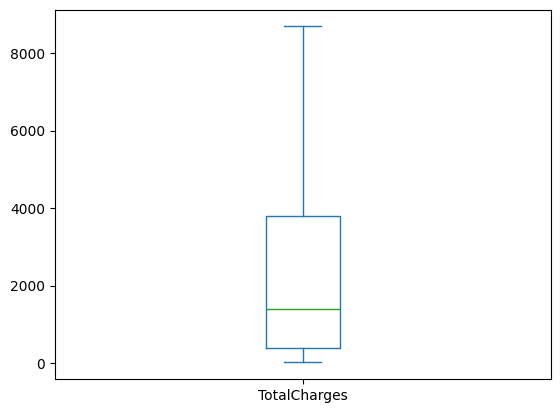

In [93]:
# Box Plot Geral
df_churn['TotalCharges'].plot.box()

TotalCharges    Axes(0.125,0.11;0.775x0.77)
dtype: object

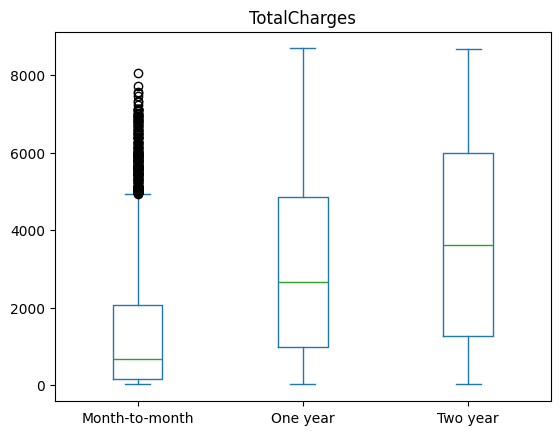

In [94]:
# Box Plot agrupado por Contract
df_churn.plot.box(column='TotalCharges', by='Contract')

In [96]:
# Criar um dataframe somente com clientes do tipo Month to Month (Contrato Mensal)
df_churn_month = df_churn[df_churn.Contract=='Month-to-month']

In [97]:
df_churn_month

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,38,Month-to-month,Yes,Credit card (automatic),69.500000000000000,2625.250000000000000,No,No
7034,0639-TSIQW,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,67,Month-to-month,Yes,Credit card (automatic),102.950000000000003,6886.250000000000000,Yes,No
7035,8456-QDAVC,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Yes,No,19,Month-to-month,Yes,Bank transfer (automatic),78.700000000000003,1495.099999999999909,No,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,No


<Axes: ylabel='Frequency'>

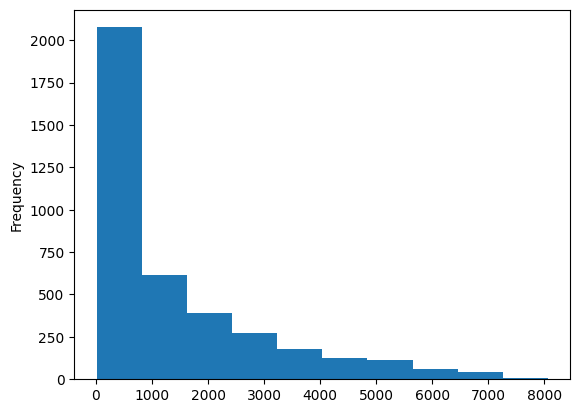

In [98]:
# Histograma - Checar visualmente se os dados seguem uma distribuição normal
df_churn_month.TotalCharges.plot.hist()

In [100]:
# Método de Tukey - IQR (Distribuição não normal)

# IQR - Range Interquartil = 3º quartil - 1º quartil
q1_TotalCharges_month = df_churn_month.TotalCharges.quantile(0.25)
q3_TotalCharges_month = df_churn_month.TotalCharges.quantile(0.75)

iqr_TotalCharges_month = q3_TotalCharges_month - q1_TotalCharges_month
iqr_TotalCharges_month


np.float64(1906.4)

In [102]:
# Limites Inferior e Superior
limInf_TotalCharges_month = q1_TotalCharges_month - (iqr_TotalCharges_month * 1.5)
limSup_TotalCharges_month = q3_TotalCharges_month + (iqr_TotalCharges_month * 1.5)
limInf_TotalCharges_month, limSup_TotalCharges_month

(np.float64(-2699.5000000000005), np.float64(4926.1))

In [104]:
df_churn_month[(df_churn_month.TotalCharges < limInf_TotalCharges_month) | 
(df_churn_month.TotalCharges > limSup_TotalCharges_month) ]

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
13,0280-XJGEX,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,49,Month-to-month,Yes,Bank transfer (automatic),103.700000000000003,5036.300000000000182,Yes,No
61,1215-FIGMP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,60,Month-to-month,Yes,Bank transfer (automatic),89.900000000000006,5450.699999999999818,No,No
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No
110,0486-HECZI,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,55,Month-to-month,Yes,Electronic check,96.750000000000000,5238.899999999999636,Yes,No
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2363-BJLSL,Male,0,No,No,Yes,No,DSL,No,Yes,...,Yes,Yes,62,Month-to-month,Yes,Bank transfer (automatic),80.400000000000006,4981.149999999999636,No,No
6952,6394-MFYNG,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,48,Month-to-month,Yes,Bank transfer (automatic),107.400000000000006,5121.300000000000182,Yes,No
6965,7789-CRUVC,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,61,Month-to-month,Yes,Credit card (automatic),94.200000000000003,5895.449999999999818,No,No
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No


In [107]:
# ZScore (Usado para Distribuição Normal)
# Indica quantos desvios padrões um ponto específico de dados está distante da média

# zscore = (x - média) / desvio padrão
from scipy.stats import zscore

In [110]:
z = np.abs(zscore(df_churn_month.TotalCharges))
z

0      0.830035854105835
2      0.781512944511796
4      0.754555772515107
5      0.340066014124648
6      0.359519077072167
              ...       
7033   0.778346771186232
7034   3.418910216654943
7035   0.077987048610201
7040   0.633837218378213
7041   0.658532466747594
Name: TotalCharges, Length: 3875, dtype: float64

In [112]:
df_churn_month[z > 3.0]

,IDCliente,Genero,Mais65Anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No
339,1343-EHPYB,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.400000000000006,6603.000000000000000,Yes,No
402,0979-PHULV,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,69,Month-to-month,Yes,Credit card (automatic),99.450000000000003,7007.600000000000364,Yes,No
445,7752-XUSCI,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,60,Month-to-month,Yes,Electronic check,105.900000000000006,6396.449999999999818,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,1548-FEHVL,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,61,Month-to-month,Yes,Electronic check,106.200000000000003,6375.199999999999818,No,No
6587,7426-GSWPO,Male,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,64,Month-to-month,Yes,Bank transfer (automatic),103.500000000000000,6548.649999999999636,No,No
6713,4989-LIXVT,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,68,Month-to-month,Yes,Electronic check,95.900000000000006,6503.199999999999818,No,No
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No
